In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ec-mixed-class/mixed_fcfp.csv
/kaggle/input/ec-mixed-class/mixed_desc.csv
/kaggle/input/ec-mixed-class/mixed_ecfp.csv
/kaggle/input/playground-series-s3e18/sample_submission.csv
/kaggle/input/playground-series-s3e18/train.csv
/kaggle/input/playground-series-s3e18/test.csv


In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

In [3]:
train_path = "../input/playground-series-s3e18/train.csv"
test_path = "../input/playground-series-s3e18/test.csv"
sub_path = "../input/playground-series-s3e18/sample_submission.csv"

train_data = pd.read_csv(train_path,index_col="id")
test_data = pd.read_csv(test_path,index_col="id")
sub_df = pd.read_csv(sub_path)




target_cols = ['EC1','EC2']
num_cols = ['BertzCT','Chi1','Chi1n','Chi1v','Chi2n','Chi2v','Chi3v','Chi4n','EState_VSA1','EState_VSA2','ExactMolWt','FpDensityMorgan1','FpDensityMorgan2','FpDensityMorgan3','HallKierAlpha',
            'HeavyAtomMolWt','Kappa3','MaxAbsEStateIndex','MinEStateIndex','NumHeteroatoms','PEOE_VSA10','PEOE_VSA14','PEOE_VSA6','PEOE_VSA7','PEOE_VSA8','SMR_VSA10','SMR_VSA5','SlogP_VSA3',
            'VSA_EState9','fr_COO', 'fr_COO2',]

In [4]:
def corr_matrix(data):
    plt.figure(figsize = (80,25))
    sns.heatmap(data.corr(),cmap="YlGnBu", annot=True)

In [5]:
train_data.head()

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,...,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6
id,,,,,,,,,,,,,,,,,,,,,
0,323.390782,9.879918,5.875576,5.875576,4.304757,4.304757,2.754513,1.749203,0.000000,11.938294,...,4.794537,35.527357,0,0,1,1,0,0,0,0
1,273.723798,7.259037,4.441467,5.834958,3.285046,4.485235,2.201375,1.289775,45.135471,0.000000,...,13.825658,44.707310,0,0,0,1,1,0,0,0
2,521.643822,10.911303,8.527859,11.050864,6.665291,9.519706,5.824822,1.770579,15.645394,6.606882,...,17.964475,45.660120,0,0,1,1,0,0,1,0
3,567.431166,12.453343,7.089119,12.833709,6.478023,10.978151,7.914542,3.067181,95.639554,0.000000,...,31.961948,87.509997,0,0,1,1,0,0,0,0
4,112.770735,4.414719,2.866236,2.866236,1.875634,1.875634,1.036450,0.727664,17.980451,12.841643,...,9.589074,33.333333,2,2,1,0,1,1,1,0


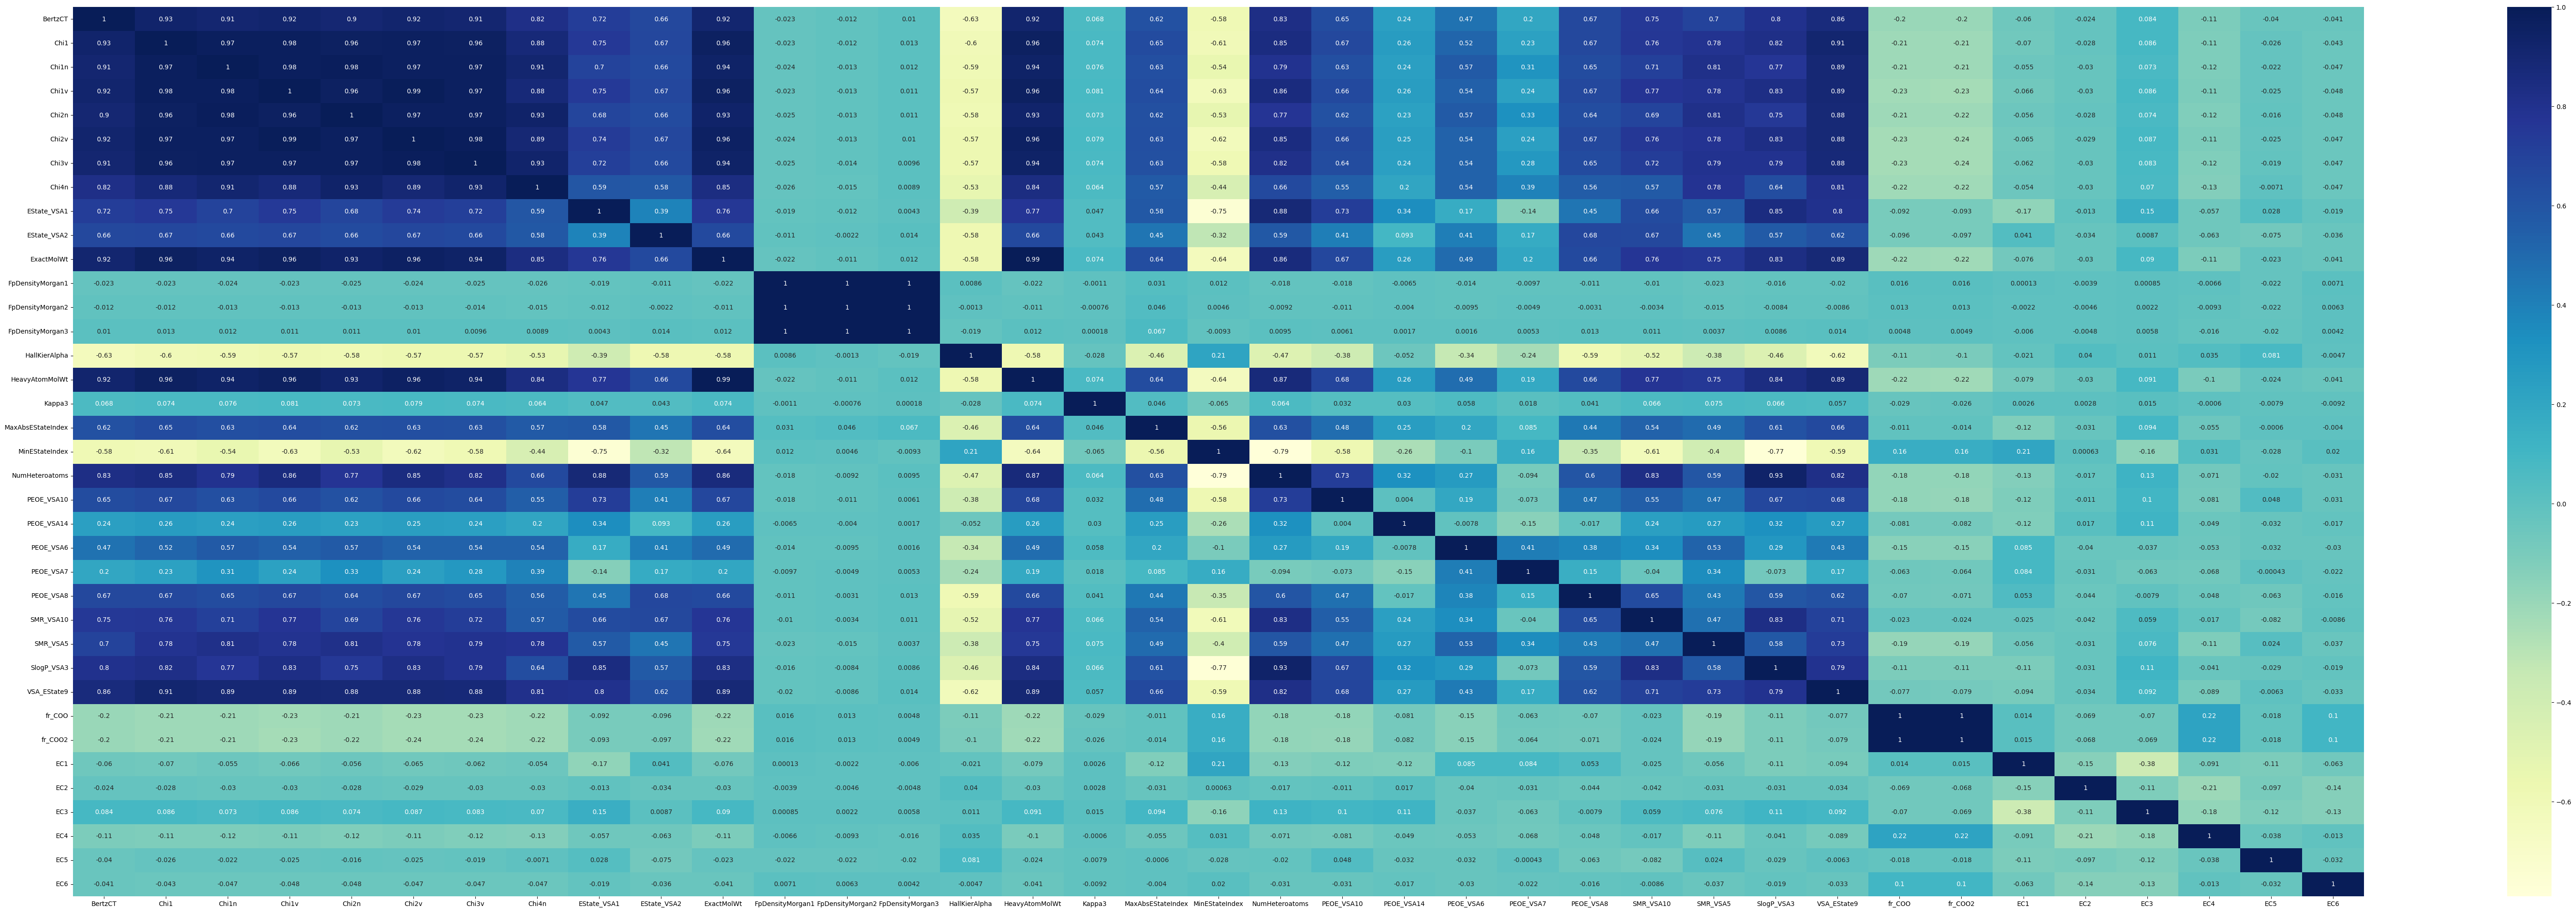

In [6]:
corr_matrix(train_data)

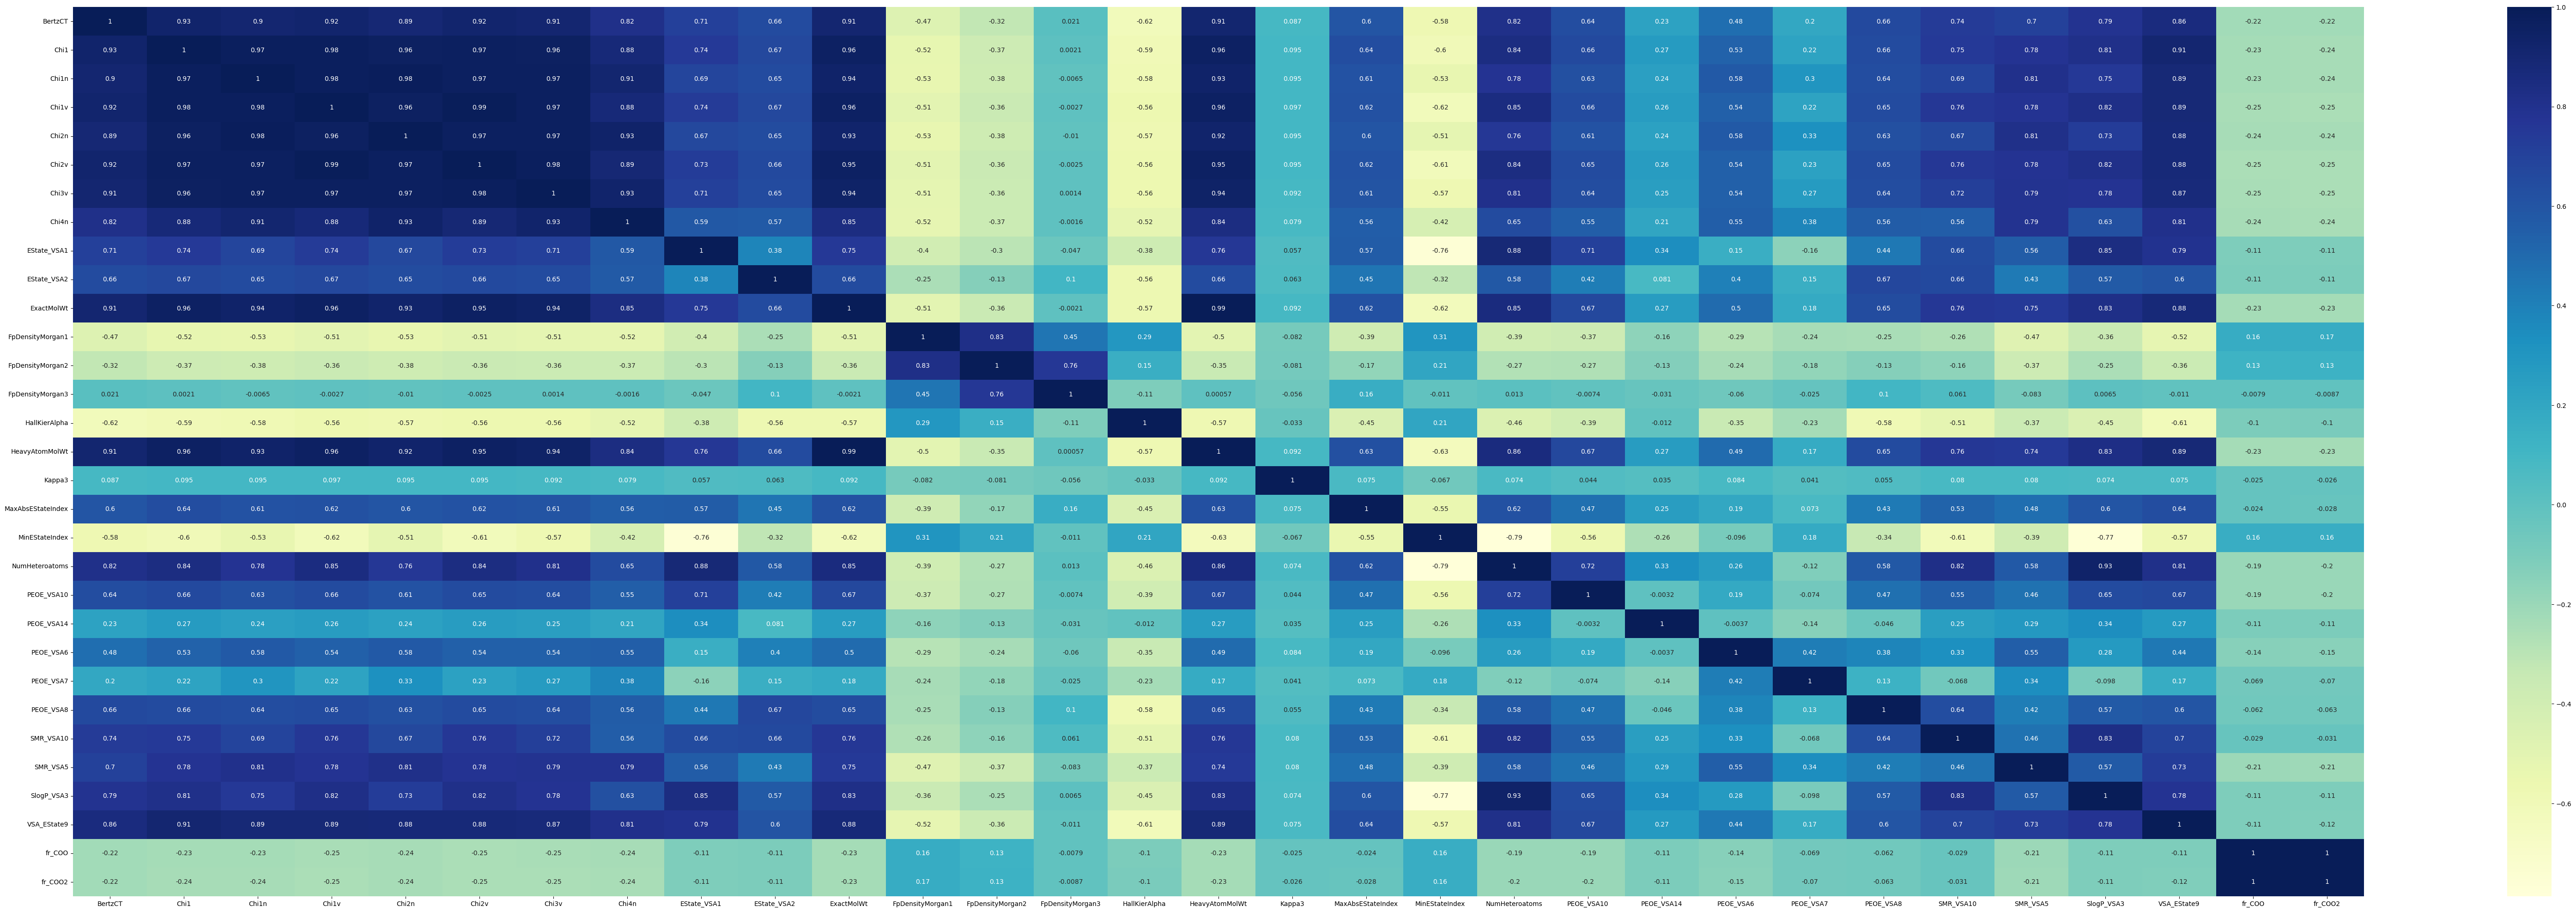

In [7]:
corr_matrix(test_data)

In [8]:
train_data = train_data[train_data.columns[:33]]

In [9]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
EC_12 = train_data[['EC1','EC2']]

scaler.fit(train_data[train_data.columns[:31]])
train_data = pd.DataFrame(scaler.transform(train_data[train_data.columns[:31]]),columns = train_data.columns[:31])
test_data = pd.DataFrame(scaler.transform(test_data[train_data.columns[:31]]),columns = test_data.columns)


In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BertzCT            14838 non-null  float64
 1   Chi1               14838 non-null  float64
 2   Chi1n              14838 non-null  float64
 3   Chi1v              14838 non-null  float64
 4   Chi2n              14838 non-null  float64
 5   Chi2v              14838 non-null  float64
 6   Chi3v              14838 non-null  float64
 7   Chi4n              14838 non-null  float64
 8   EState_VSA1        14838 non-null  float64
 9   EState_VSA2        14838 non-null  float64
 10  ExactMolWt         14838 non-null  float64
 11  FpDensityMorgan1   14838 non-null  float64
 12  FpDensityMorgan2   14838 non-null  float64
 13  FpDensityMorgan3   14838 non-null  float64
 14  HallKierAlpha      14838 non-null  float64
 15  HeavyAtomMolWt     14838 non-null  float64
 16  Kappa3             148

In [11]:
train_data.describe()

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,...,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2
count,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,...,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000
mean,0.126575,0.131345,0.116679,0.126114,0.137677,0.151918,0.149415,0.110340,0.080292,0.104420,...,0.036876,0.023873,0.053517,0.066812,0.194034,0.063050,0.118165,0.128261,0.057277,0.057403
std,0.133283,0.098057,0.092618,0.109793,0.116803,0.142428,0.150178,0.116090,0.087237,0.136605,...,0.071640,0.052625,0.095365,0.108277,0.223925,0.068794,0.126497,0.075887,0.083493,0.083514
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.014125,0.000000,0.000000
25%,0.036635,0.067299,0.056693,0.054889,0.060559,0.058835,0.050731,0.031351,0.016412,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.073930,0.013031,0.041545,0.078033,0.000000,0.000000
50%,0.071497,0.093245,0.080772,0.082214,0.092263,0.093778,0.085164,0.066775,0.047713,0.064249,...,0.012373,0.000000,0.000000,0.000000,0.145556,0.040743,0.083090,0.108380,0.000000,0.000000
75%,0.160358,0.160608,0.149215,0.159602,0.179802,0.191136,0.196762,0.157675,0.123387,0.128498,...,0.032430,0.032317,0.065472,0.068997,0.219487,0.086716,0.129219,0.145898,0.125000,0.125000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
train_data['EC1'] = EC_12['EC1']
train_data['EC2'] = EC_12['EC2']

In [13]:
train_data

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,...,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2
0,0.079458,0.142053,0.117103,0.109964,0.133707,0.124489,0.120385,0.108830,0.000000,0.119459,...,0.000000,0.000000,0.219762,0.000000,0.041545,0.092411,0.00,0.00,1,1
1,0.067255,0.104370,0.088520,0.109204,0.102035,0.129709,0.096210,0.080246,0.124099,0.000000,...,0.000000,0.000000,0.096885,0.062318,0.119800,0.116289,0.00,0.00,0,1
2,0.128169,0.156882,0.169964,0.206821,0.207026,0.275301,0.254572,0.110160,0.043017,0.066111,...,0.252378,0.000000,0.193770,0.148446,0.155663,0.118767,0.00,0.00,1,1
3,0.139419,0.179053,0.141289,0.240188,0.201210,0.317477,0.345903,0.190830,0.262958,0.000000,...,0.000000,0.063985,0.193770,0.126047,0.276952,0.227624,0.00,0.00,1,1
4,0.027708,0.063474,0.057125,0.053643,0.058258,0.054242,0.045298,0.045273,0.049437,0.128498,...,0.091661,0.000000,0.147861,0.038324,0.083090,0.086704,0.25,0.25,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14833,0.155335,0.156882,0.131141,0.171807,0.144542,0.174383,0.160419,0.110160,0.090654,0.066111,...,0.065472,0.068997,0.426142,0.066176,0.164181,0.159648,0.00,0.00,1,1
14834,0.015373,0.037997,0.028837,0.027079,0.027317,0.025434,0.007632,0.000000,0.000000,0.000000,...,0.000000,0.060453,0.000000,0.013031,0.000000,0.026011,0.00,0.00,0,1
14835,0.241115,0.148999,0.122497,0.115029,0.146002,0.135936,0.133948,0.132764,0.047424,0.000000,...,0.000000,0.236800,0.135855,0.000000,0.000000,0.173408,0.00,0.00,1,1
14836,0.073507,0.143048,0.131337,0.146895,0.163892,0.158373,0.173900,0.143088,0.125441,0.000000,...,0.000000,0.000000,0.096885,0.221138,0.078755,0.118567,0.00,0.00,0,1


In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [15]:
X = train_data[train_data.columns[:31]]
y = train_data[train_data.columns[31:]]

In [16]:
model = Sequential()
model.add(Dense(16, input_shape = (31,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer = Adam(learning_rate = 0.0001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                512       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,089
Trainable params: 1,089
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(X,y['EC1'],
          validation_split = 0.1, batch_size = 10,
          shuffle =True, epochs = 10)

Epoch 1/10
1336/1336 [==============================] - 3s 2ms/step - loss: 0.6605 - accuracy: 0.6324 - val_loss: 0.6339 - val_accuracy: 0.6664
Epoch 2/10
1336/1336 [==============================] - 2s 2ms/step - loss: 0.6220 - accuracy: 0.6689 - val_loss: 0.6212 - val_accuracy: 0.6732
Epoch 3/10
1336/1336 [==============================] - 2s 2ms/step - loss: 0.6073 - accuracy: 0.6851 - val_loss: 0.6183 - val_accuracy: 0.6813
Epoch 4/10
1336/1336 [==============================] - 2s 2ms/step - loss: 0.6014 - accuracy: 0.6941 - val_loss: 0.6173 - val_accuracy: 0.6813
Epoch 5/10
1336/1336 [==============================] - 2s 2ms/step - loss: 0.5979 - accuracy: 0.6945 - val_loss: 0.6156 - val_accuracy: 0.6860
Epoch 6/10
1336/1336 [==============================] - 2s 2ms/step - loss: 0.5949 - accuracy: 0.6944 - val_loss: 0.6143 - val_accuracy: 0.6860
Epoch 7/10
1336/1336 [==============================] - 2s 2ms/step - loss: 0.5922 - accuracy: 0.6961 - val_loss: 0.6126 - val_accuracy:

In [19]:
y_preds = model.predict(test_data)

310/310 [==============================] - 0s 1ms/step


In [20]:
a1 = (y_preds.max()+y_preds.min())/2

In [21]:
for i in range(len(y_preds)):
    if y_preds[i] > a1:
        y_preds[i] = 1
    else: y_preds[i] = 0
    


In [22]:
y_preds

array([[0.],
       [1.],
       [1.],
       ...,
       [0.],
       [1.],
       [0.]], dtype=float32)

In [23]:
sub_df['EC1'] = y_preds

In [24]:
model = Sequential()
model.add(Dense(16, input_shape = (31,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer = Adam(learning_rate = 0.0001), loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                512       
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,089
Trainable params: 1,089
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(X,y['EC2'],
          validation_split = 0.1, batch_size = 10,
          shuffle =True, epochs = 10)

Epoch 1/10
1336/1336 [==============================] - 3s 2ms/step - loss: 0.5638 - accuracy: 0.7631 - val_loss: 0.5278 - val_accuracy: 0.7871
Epoch 2/10
1336/1336 [==============================] - 2s 2ms/step - loss: 0.5035 - accuracy: 0.8003 - val_loss: 0.5174 - val_accuracy: 0.7871
Epoch 3/10
1336/1336 [==============================] - 2s 2ms/step - loss: 0.4992 - accuracy: 0.8003 - val_loss: 0.5160 - val_accuracy: 0.7871
Epoch 4/10
1336/1336 [==============================] - 2s 2ms/step - loss: 0.4981 - accuracy: 0.8003 - val_loss: 0.5157 - val_accuracy: 0.7871
Epoch 5/10
1336/1336 [==============================] - 2s 2ms/step - loss: 0.4975 - accuracy: 0.8003 - val_loss: 0.5153 - val_accuracy: 0.7871
Epoch 6/10
1336/1336 [==============================] - 3s 2ms/step - loss: 0.4970 - accuracy: 0.8003 - val_loss: 0.5146 - val_accuracy: 0.7871
Epoch 7/10
1336/1336 [==============================] - 2s 2ms/step - loss: 0.4966 - accuracy: 0.8003 - val_loss: 0.5146 - val_accuracy:

In [26]:
y_preds = model.predict(test_data)

310/310 [==============================] - 0s 1ms/step


In [27]:
a2 = (y_preds.max()+y_preds.min())/2

In [28]:
for i in range(len(y_preds)):
    if y_preds[i] > a1:
        y_preds[i] = 1
    else: y_preds[i] = 0
    


In [29]:
y_preds

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [30]:
sub_df['EC2'] = y_preds

In [31]:
sub_df

,id,EC1,EC2
0,14838,0.0,1.0
1,14839,1.0,1.0
2,14840,1.0,1.0
3,14841,1.0,1.0
4,14842,1.0,1.0
...,...,...,...
9888,24726,1.0,1.0
9889,24727,1.0,1.0
9890,24728,0.0,1.0
9891,24729,1.0,1.0


In [32]:
sub_df.to_csv('submission.csv', index = False)